1. загрузите датасет iris (уже использовали при изучении Seaborn)

In [ ]:
import seaborn as sb

data = sb.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


2. дайте описание каждого признака и целевой переменной

In [ ]:
print("количество записей, возможные пропущенные значения")
data.info()

количество записей, возможные пропущенные значения
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
print("статистические метрики")
data.describe()

статистические метрики


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
print("виды классов")
print(data.species.unique())
print("количество действительных записей")
print(len([x for x in data.species if len(x) > 1]))

виды классов
['setosa' 'versicolor' 'virginica']
количество действительных записей
150


3. как наблюдения распределились по классам? (сколько в каждом классе?). Для ответа используйте метод value_counts().

In [ ]:
data.species.value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


4. Разделите данные на признаки и ответы, а затем на обучающую и тестовую выборки.

In [ ]:
from sklearn.model_selection import train_test_split

dx = data.loc[:, data.columns != "species"]
dy = data["species"]
dx_train, dx_test, dy_train, dy_test = train_test_split(dx, dy, test_size=0.3)
print("количество для тренировки:", len(dx_train))
print("количество для проверки:", len(dy_test))

количество для тренировки: 105
количество для проверки: 45


5. Обучите модель логистической регрессии (LogisticRegression или LogisticRegression_CV, дайте описание гиперпараметров модели).

In [ ]:
from sklearn.linear_model import LogisticRegression

# возьмем параметры по умолчанию:
# penalty='l2' - регуляризация l2,
# tol=0.0001 - точность остановки,
# C=1.0 - параметр регуляризации (1/λ), меньше -> сильнее,
# random_state=None - перемешивание данных,
# max_iter=100 - максимум шагов.
lr = LogisticRegression()
lr.fit(dx_train, dy_train)

LogisticRegression()

6. С помощью метода predict_proba получите вероятности принадлежности классам объектов тестовой выборки (вывод оформите в два столбца: значение вероятности, верный ответ).

In [ ]:
import numpy as np

dy_pred = np.round(lr.predict_proba(dx_test), 2)
print("вероятности в .%\t | предсказанный класс | действительный класс")
for i, y_pred in enumerate(dy_pred):
    print([str(x).zfill(4) for x in y_pred], " ",
          lr.predict(dx_test.iloc[[i]])[0], "\t\t",
          dy_test.iloc[i])

вероятности в .%	 | предсказанный класс | действительный класс
['00.0', '0.06', '0.94']   virginica 		 virginica
['00.0', '0.87', '0.13']   versicolor 		 versicolor
['0.95', '0.05', '00.0']   setosa 		 setosa
['00.0', '0.05', '0.95']   virginica 		 virginica
['0.03', '0.92', '0.05']   versicolor 		 versicolor
['00.0', '0.11', '0.89']   virginica 		 virginica
['0.18', '0.81', '00.0']   versicolor 		 versicolor
['0.93', '0.07', '00.0']   setosa 		 setosa
['00.0', '0.03', '0.97']   virginica 		 virginica
['00.0', '0.03', '0.97']   virginica 		 virginica
['0.98', '0.02', '00.0']   setosa 		 setosa
['0.08', '0.92', '0.01']   versicolor 		 versicolor
['0.96', '0.04', '00.0']   setosa 		 setosa
['00.0', '0.17', '0.83']   virginica 		 virginica
['0.03', '0.94', '0.02']   versicolor 		 versicolor
['00.0', '0.76', '0.24']   versicolor 		 versicolor
['0.96', '0.04', '00.0']   setosa 		 setosa
['0.98', '0.02', '00.0']   setosa 		 setosa
['00.0', '0.01', '0.99']   virginica 		 virginica
['0.97', '0

7. получите матрицу несоответствий / ошибок (confusion matrix). Дайте пояснения.

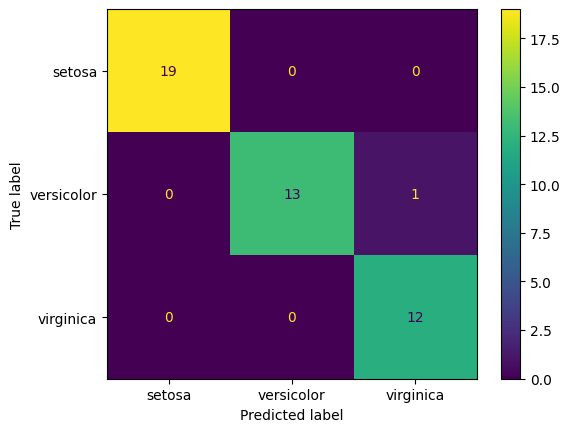

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(lr, dx_test, dy_test)
# здесь в цветных клетках количество правильно предсказанных моделью объектов,
# в фиолетовых - неправильно предсказанные.
# Tse Fve Fvi
# Fse Tve Fvi
# Fse Fve Tvi

8. Получите оценки качества классификации: доля правильных ответов, точность, полнота, F-меру, AUC. Дайте пояснения.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

print(classification_report(dy_test, lr.predict(dx_test)))
# доля правильных ответов: accuracy: процент всех объектов определено правильно,
# точность: precision: процент правильно определенных из предсказанных,
# полнота: recall: процент правильно определенных из класса,
# f-мера: f1-score: гармоническое среднее точности и полноты,

print("AUC:", round(roc_auc_score(dy_test, lr.predict_proba(dx_test), multi_class='ovo'), 3))
# AUC: площадь под характеристической кривой: 1 - лучше, 0 - хуже,
# параметр ovo означает что каждый класс сравнивается с каждым,
# лучше с несбалансированными классами.

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.93      0.96        14
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

AUC: 0.996


9. Определите 2 признака с наибольшей дисперсией и постройте модель классификации. Сильно ли ухудшились оценки качества модели?

In [ ]:
vars = dx.var()
top_2_var = vars.nlargest(2).index
print("признаки с наибольшей дисперсией:")
for i in top_2_var:
  print(i, "\t", round(vars[i], 3))

признаки с наибольшей дисперсией:
petal_length 	 3.116
sepal_length 	 0.686


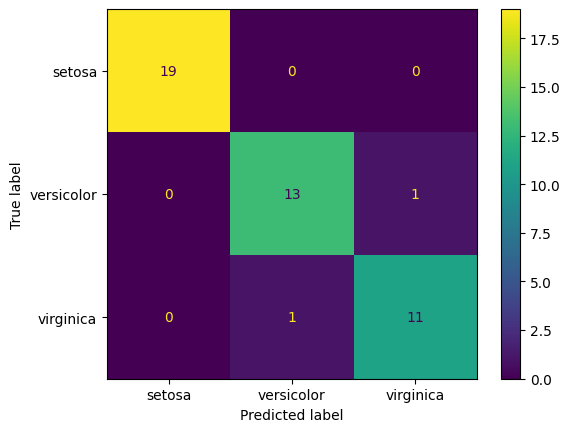

In [ ]:
lrv = LogisticRegression()
lrv.fit(dx_train[top_2_var], dy_train)
ConfusionMatrixDisplay.from_estimator(lrv, dx_test[top_2_var], dy_test)

In [ ]:
print(classification_report(dy_test, lrv.predict(dx_test[top_2_var])))
# совершено на 1 ошибку больше, ухудшение ~2% (по accuracy).

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.93      0.93      0.93        14
   virginica       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



10. Отобразите наблюдения на плоскости каждый своим цветом. Попробуйте взять в качестве двух признаков длину и ширину лепестков. Как они отобразились на рисунке? Попробуйте взять два признака с наименьшей корреляцией.

Text(0, 0.5, 'petal_width')

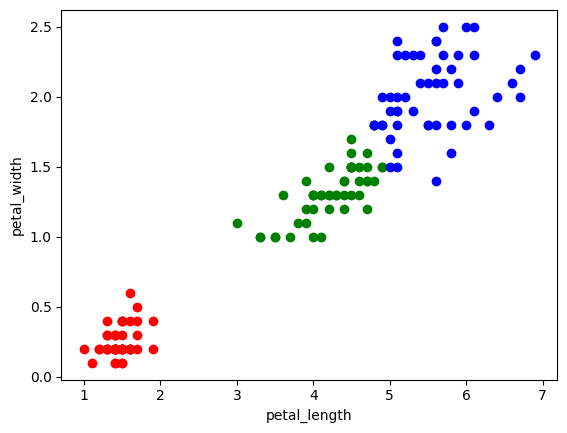

In [ ]:
import matplotlib.pyplot as plt

dxc = [dx[[y_pred == y for y_pred in lr.predict(dx)]] for y in data.species.unique()]
for i, color in enumerate(["red", "green", "blue"]):
    plt.scatter(dxc[i][["petal_length"]], dxc[i][["petal_width"]], color=color)
plt.xlabel("petal_length")
plt.ylabel("petal_width")

In [ ]:
corrmat = data.corr(numeric_only=True).abs()
np.fill_diagonal(corrmat.values, np.nan)
corrlist = corrmat.unstack()
corrsort = corrlist.sort_values(ascending=False)
print("два признака с наименьшей корреляцией:", *corrsort.index[0])
# по этим признакам и построен предыдущий график.

два признака с наименьшей корреляцией: petal_length petal_width


11. Модель LogisticRegression для классификации использует стратегию один против всех в случае нескольких классов. Постарайтесь отобразить на графике наблюдения (каждый класс своим цветом) и гиперплоскости (в 2Д - прямые), разделяющие эти классы. Можно использовать принцип построения линий уровня для функции 2-х перемнных (см. прилагаемые материалы).

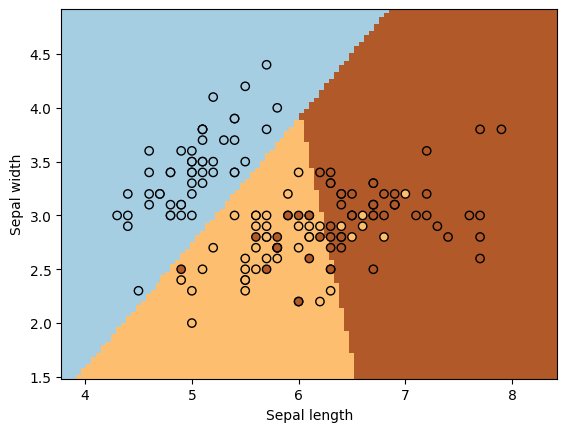

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

X = np.array(dx.iloc[:, 0:2])
Y = [list(data.species.unique()).index(i) for i in dy]

logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)